In [881]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [882]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [883]:
NUM_CLASSES = 33

# Dataset reading

In [884]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [885]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [886]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [887]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [888]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_84 (Dropout)        (None, 42)                0         
                                                                 
 dense_126 (Dense)           (None, 20)                860       
                                                                 
 dropout_85 (Dropout)        (None, 20)                0         
                                                                 
 dense_127 (Dense)           (None, 10)                210       
                                                                 
 dense_128 (Dense)           (None, 33)                363       
                                                                 
Total params: 1433 (5.60 KB)
Trainable params: 1433 (5.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [889]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [890]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [891]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/10 [==>...........................] - ETA: 2s - loss: 3.5709 - accuracy: 0.0234
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
10/10 [==============================] - 0s 13ms/step - loss: 3.5475 - accuracy: 0.0363 - val_loss: 3.4824 - val_accuracy: 0.0346
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.4999 - accuracy: 0.0234
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
10/10 [==============================] - 0s 3ms/step - loss: 3.4969 - accuracy: 0.0413 - val_loss: 3.4444 - val_accuracy: 0.0346
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.4351 - accuracy: 0.0547
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
10/10 [==============================] - 0s 3ms/step - loss: 3.4586 - accuracy: 0.0363 - val_loss: 3.4109 - val_accuracy: 0.0716
Epoch 4/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.4500 - accuracy: 0.0625


/Users/nich/Desktop/Development/specilization/hand-gesture-recognition-trainer/HandTracking/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
10/10 [==============================] - 0s 3ms/step - loss: 3.2873 - accuracy: 0.0710 - val_loss: 3.1947 - val_accuracy: 0.1704
Epoch 9/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.2983 - accuracy: 0.0469
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 3.2473 - accuracy: 0.0776 - val_loss: 3.1319 - val_accuracy: 0.1728
Epoch 10/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.1313 - accuracy: 0.1094
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
10/10 [==============================] - 0s 6ms/step - loss: 3.2057 - accuracy: 0.0842 - val_loss: 3.0649 - val_accuracy: 0.1704
Epoch 11/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.2351 - accuracy: 0.0625
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
10/10 [=========

In [892]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.9654


In [893]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [894]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 32ms/step
[2.25668159e-16 3.77246282e-15 6.91755414e-01 1.45720258e-01
 1.06905594e-04 5.28047188e-17 1.17541060e-01 8.15088526e-07
 1.64775494e-02 3.91385038e-06 1.15791855e-10 1.39304379e-04
 3.82925332e-12 3.63708568e-05 1.78708132e-18 1.92040656e-25
 9.19738152e-09 3.83143828e-08 9.30269692e-08 1.06501982e-12
 1.72566852e-14 1.60835512e-11 3.21972533e-15 1.00300787e-03
 3.41374692e-21 2.40364075e-02 1.14571781e-16 2.21684867e-12
 8.68308382e-15 1.83575519e-03 9.03688322e-12 1.34301651e-03
 1.17940351e-14]
2


# Confusion matrix

13/13 [==============================] - 0s 619us/step


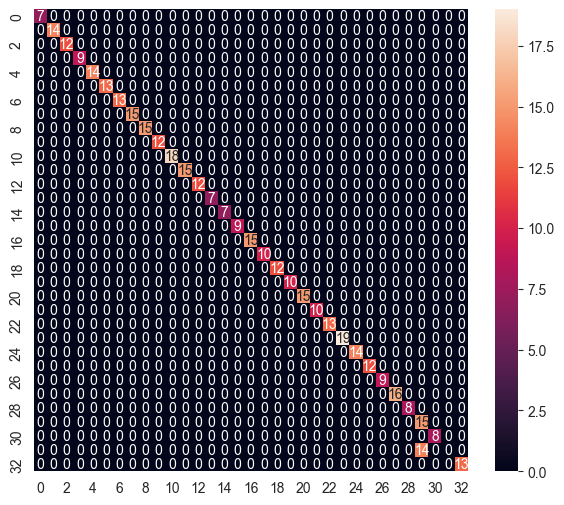

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00        15
     

/Users/nich/Desktop/Development/specilization/hand-gesture-recognition-trainer/HandTracking/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nich/Desktop/Development/specilization/hand-gesture-recognition-trainer/HandTracking/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nich/Desktop/Development/specilization/hand-gesture-recognition-trainer/HandTracking/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are il

In [895]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [896]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/nich/Desktop/Development/specilization/hand-gesture-recognition-trainer/HandTracking/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [897]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/75/j6r1rs4d2kxd63d8qwhgzdmr0000gn/T/tmpp_8q163o/assets


INFO:tensorflow:Assets written to: /var/folders/75/j6r1rs4d2kxd63d8qwhgzdmr0000gn/T/tmpp_8q163o/assets
2024-01-24 12:08:55.812044: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-24 12:08:55.812064: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.


7900

# Inference test

In [898]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [899]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [900]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [901]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 77 µs, sys: 23 µs, total: 100 µs
Wall time: 93.9 µs


In [902]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.25668212e-16 3.77247765e-15 6.91755414e-01 1.45720392e-01
 1.06906009e-04 5.28051324e-17 1.17541008e-01 8.15089265e-07
 1.64775886e-02 3.91385811e-06 1.15792306e-10 1.39304393e-04
 3.82927587e-12 3.63709951e-05 1.78708835e-18 1.92041396e-25
 9.19739840e-09 3.83144574e-08 9.30271398e-08 1.06502405e-12
 1.72568191e-14 1.60835841e-11 3.21973804e-15 1.00300880e-03
 3.41376025e-21 2.40364484e-02 1.14572681e-16 2.21685734e-12
 8.68311770e-15 1.83575519e-03 9.03688409e-12 1.34301779e-03
 1.17940597e-14]
2
